In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv(r'C:\Users\Nowy_użytkownik\Desktop\Online_Sales.csv')
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [3]:
#removing unnecessary columns
sales = sales[['CustomerID', 'Transaction_ID', 'Transaction_Date']]
sales

In [5]:
#checking null values
sales.isnull().sum()

CustomerID          0
Transaction_ID      0
Transaction_Date    0
dtype: int64

In [6]:
#checking data types
sales.dtypes

CustomerID           int64
Transaction_ID       int64
Transaction_Date    object
dtype: object

In [7]:
#function which extracts year and month from a column and add first day    
def month_year(x):
    return dt.datetime(x.year, x.month, 1)    

In [8]:
#adding two columns: month and year of current transaction('Transaction_Month') and
#month and year of first purchase by customer('Cohort_Month')
sales['Transaction_Month'] = pd.to_datetime(sales['Transaction_Date']).apply(month_year)
sales['Cohort_Month'] = sales.groupby('CustomerID')['Transaction_Month'].transform('min')

In [14]:
sales.dtypes

CustomerID                    int64
Transaction_ID                int64
Transaction_Date             object
Transaction_Month    datetime64[ns]
Cohort_Month         datetime64[ns]
dtype: object

In [16]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Transaction_Month,Cohort_Month
0,17850,16679,1/1/2019,2019-01-01,2019-01-01
1,17850,16680,1/1/2019,2019-01-01,2019-01-01
2,17850,16681,1/1/2019,2019-01-01,2019-01-01
3,17850,16682,1/1/2019,2019-01-01,2019-01-01
4,17850,16682,1/1/2019,2019-01-01,2019-01-01


In [23]:
#adding cohort index by calculating difference (in months) between month of first purchase ('Cohort_Month') 
#and month of current purchase ('Transaction_Month')     
sales['Cohort_Index'] = sales['Transaction_Month'].dt.month - sales['Cohort_Month'].dt.month + 1

In [47]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Transaction_Month,Cohort_Month,Cohort_Index
0,17850,16679,1/1/2019,2019-01-01,2019-01-01,1
1,17850,16680,1/1/2019,2019-01-01,2019-01-01,1
2,17850,16681,1/1/2019,2019-01-01,2019-01-01,1
3,17850,16682,1/1/2019,2019-01-01,2019-01-01,1
4,17850,16682,1/1/2019,2019-01-01,2019-01-01,1


In [50]:
sales['Cohort_Month'] = sales['Cohort_Month'].dt.date

In [51]:
#calculating number of unique customers for each cohort index within cohort month 
cohort = pd.DataFrame(sales.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique())
cohort = cohort.rename(columns={'CustomerID':'Customers'})

In [53]:
#calculating cohort retention rate
cohort['Retention_Rate'] = cohort['Customers'] / cohort.groupby('Cohort_Month')['Customers'].apply('max')

In [55]:
#pivoting the dataframe
cohort_pivoted = cohort.pivot_table(index='Cohort_Month', columns='Cohort_Index', values='Retention_Rate')

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

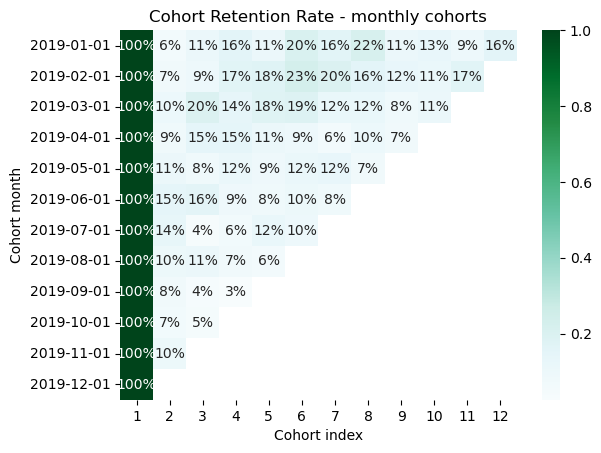

<Figure size 1500x1000 with 0 Axes>

In [61]:
#visualising cohort retention using heatmap
sns.heatmap(data=cohort_pivoted,
           cmap='BuGn',
           annot=True,
           fmt='.0%')

plt.title('Cohort Retention Rate - monthly cohorts')
plt.ylabel('Cohort month')
plt.xlabel('Cohort index')
plt.yticks(rotation='horizontal')
plt.figure(figsize=(15, 10))
plt.show()